In [1]:
# Import the numpy library and name it np
import numpy as np
# Import the pandas library and name it pd
import pandas as pd
# import matplotlib.pyplot
import matplotlib.pyplot as plt
# add the following line in order to have the plots inside the notebook
%matplotlib inline


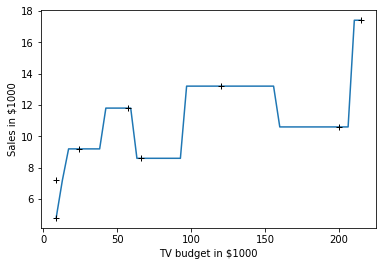

In [2]:
# Data set used in this exercise (Advertising.csv)
data_filename = 'https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/lectures/lecture5/data/Advertising.csv'

# Read Advertising.csv file using pandas libraries:
df = pd.read_csv(data_filename)

# Selecting the columns in data frame as [x,y]
df = df.iloc[5:13]

# Assigning the columns TV and Sales to x and y respectively to simplify the rest of the code
data_x = df.TV
data_y = df.sales
# Here's a function that finds the index of the nearest neighbor and returns the value of the nearest neighbor. Note that this
# is just for k = 1 and the distance function is simply the absolute value.

def find_nearest(df, value):
    data_x = df.TV
    idx = (np.abs(data_x - value)).idxmin()
    return idx, data_x[idx]

# Note that we have used the idxmin method in our function. This is because `array' is a pandas dataframe and idxmin() is designed to
# work with pandas dataframes. If we are working with a numpy array then the appropriate method would be `argmin()'.

# Create some artificial x-values (might not be in the actual dataset)
x = np.linspace(np.min(data_x), np.max(data_x))

# Initialize the y-values to zero
y = np.zeros((len(x)))

# Apply the KNN algorithm.  Try to predict the y-value at a given x-value
# Note: You may have tried to use the `range' method in your code. Enumerate is far better in this case. Try to understand why.
for i, xi in enumerate(x):
    y[i] = data_y[find_nearest(df, xi)[0]]

# Plot your solution
plt.plot(x, y, '-')
# Plot the original data using black x's.
plt.plot(df.TV, df.sales, 'k+')

plt.title('')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

# To display all figures
plt.show()

In [28]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

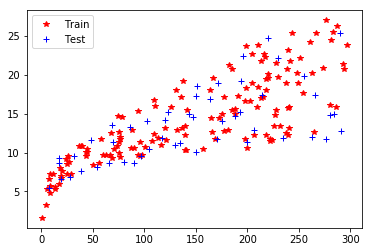

In [14]:
# Data set used in this exercise (Advertising.csv)
data_filename = 'https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/lectures/lecture5/data/Advertising.csv'

# Read Advertising.csv file using pandas libraries:
df = pd.read_csv(data_filename)

df = df[['TV','radio','newspaper','sales']]
# df_chap2 = df.sample(n=30)

data_x = df.TV
data_y = df.sales

X_train, X_test, y_train, y_test = train_test_split(data_x.values.reshape(-1, 1), data_y.values.reshape(-1, 1))

plt.plot(X_train, y_train, '*r', label="Train")
plt.plot(X_test, y_test, '+b', label="Test")
plt.legend(loc='upper left')
plt.show()

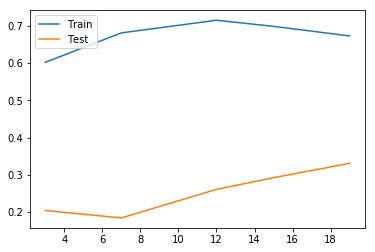

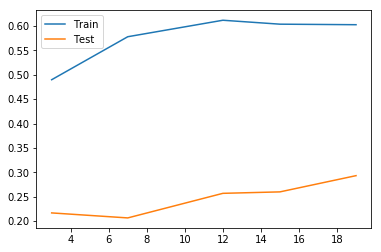

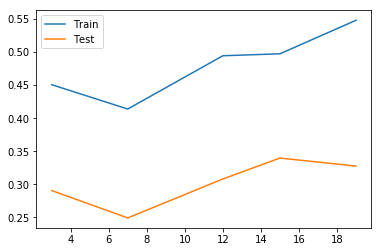

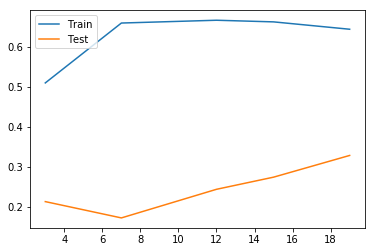

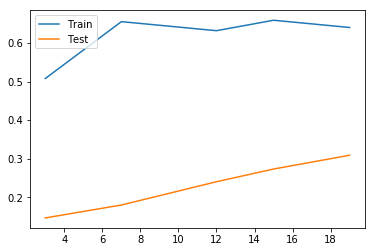

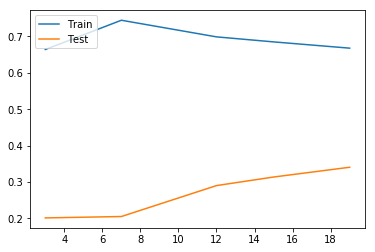

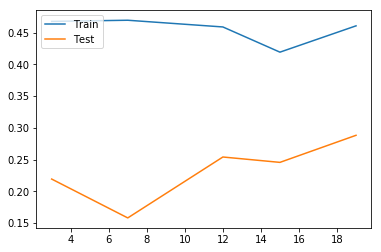

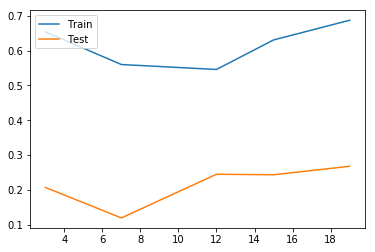

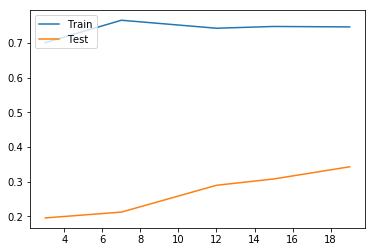

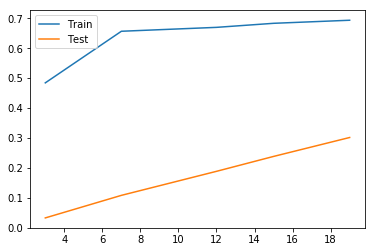

In [43]:

neighbors = [3,7,12,15,19]

kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X_train):
    
    r2_score_list_validation = []
    r2_score_list_test = []
    
    for i in range(len(neighbors)):

    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train_temp, X_test_temp = X_train[train_index], X_train[test_index]
        y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
        
        knn_validation = KNeighborsRegressor(n_neighbors = neighbors[i])
        y_pred_validation = knn_validation.fit(X_train_temp, y_train_temp).predict(X_test_temp)
        r2_score_list_validation.append(r2_score(y_test_temp, y_pred_validation))
        
        knn_test = KNeighborsRegressor(n_neighbors = neighbors[i])
        y_pred_test = knn_test.fit(X_train_temp, y_train_temp).predict(X_test)
        r2_score_list_test.append(r2_score(y_test, y_pred_test))


    plt.plot(neighbors, r2_score_list_validation, label="Train")
    plt.plot(neighbors, r2_score_list_test, label="Test")
    plt.legend(loc='upper left')
    plt.show()

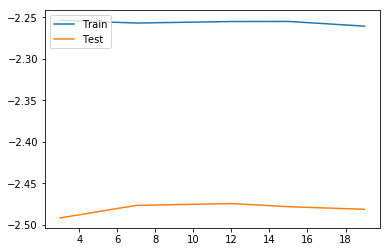

In [73]:

neighbors = [3,7,12,15,19]

# X_train, X_test, y_train, y_test = |

kf = KFold(n_splits=10)

r2_score_validation = []
r2_score_test = []
    
for i in range(len(neighbors)):
        
    knn_validation = KNeighborsRegressor(n_neighbors = neighbors[i])
    knn_test = KNeighborsRegressor(n_neighbors = neighbors[i])
    
    X_test_temp_validation = []
    y_pred_temp_validation = []
    
    real_X_test = []
    real_y_pred_test = []

    for train_index, test_index in kf.split(X_train):
        X_train_temp, X_test_temp = X_train[train_index], X_train[test_index]
        y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]

        X_test_temp_validation.append(X_test_temp)
        y_pred_temp_validation.append(knn_validation.fit(X_train_temp, y_train_temp).predict(X_test_temp))                        
        
        real_X_test.append(X_test)
        real_y_pred_test.append(knn_test.fit(X_train_temp, y_train_temp).predict(X_test))
        
    
    X_test_temp_validation = np.concatenate(X_test_temp_validation, axis=0)
    y_pred_temp_validation = np.concatenate(y_pred_temp_validation, axis=0)
    r2_score_validation.append(r2_score(X_test_temp_validation, y_pred_temp_validation))
    
    real_X_test = np.concatenate(real_X_test, axis=0)
    real_y_pred_test = np.concatenate(real_y_pred_test, axis=0)
    r2_score_test.append(r2_score(real_X_test, real_y_pred_test))


plt.plot(neighbors, r2_score_validation, label="Train")
plt.plot(neighbors, r2_score_test, label="Test")
plt.legend(loc='upper left')
plt.show()

In [69]:
r2_score_validation

[-2.253653357045875,
 -2.2570244623872524,
 -2.255189756246278,
 -2.2550960479095927,
 -2.2607551869096656]

In [70]:
real_X_test

array([[ 97.2],
       [  7.3],
       [265.6],
       [ 16.9],
       [171.3],
       [ 85.7],
       [284.3],
       [206.9],
       [ 53.5],
       [ 69.2],
       [151.5],
       [149.8],
       [104.6],
       [255.4],
       [147.3],
       [ 90.4],
       [193.7],
       [276.7],
       [ 17.2],
       [290.7],
       [ 27.5],
       [280.2],
       [142.9],
       [187.9],
       [234.5],
       [289.7],
       [ 31.5],
       [163.3],
       [123.1],
       [175.7],
       [ 19.4],
       [214.7],
       [170.2],
       [ 68.4],
       [220.3],
       [199.8],
       [195.4],
       [149.7],
       [ 48.3],
       [134.3],
       [117.2],
       [230.1],
       [102.7],
       [ 80.2],
       [262.9],
       [129.4],
       [ 66.1],
       [ 38.2],
       [193.2],
       [120.5],
       [ 97.2],
       [  7.3],
       [265.6],
       [ 16.9],
       [171.3],
       [ 85.7],
       [284.3],
       [206.9],
       [ 53.5],
       [ 69.2],
       [151.5],
       [149.8],
       [

In [71]:
real_y_pred_test

array([[12.04736842],
       [ 6.9       ],
       [19.85789474],
       [ 6.9       ],
       [15.82631579],
       [11.42105263],
       [21.15789474],
       [18.05789474],
       [10.58947368],
       [11.03684211],
       [14.55263158],
       [14.55263158],
       [12.88421053],
       [18.50526316],
       [14.28421053],
       [11.9       ],
       [17.02631579],
       [21.15789474],
       [ 6.9       ],
       [21.15789474],
       [ 8.64736842],
       [21.15789474],
       [14.07894737],
       [16.12631579],
       [15.99473684],
       [21.15789474],
       [ 8.70526316],
       [14.90526316],
       [13.41578947],
       [15.82631579],
       [ 7.38947368],
       [17.72105263],
       [16.08421053],
       [11.03684211],
       [17.81578947],
       [17.78421053],
       [17.48947368],
       [14.55263158],
       [ 9.92631579],
       [13.85263158],
       [13.15789474],
       [15.87894737],
       [12.37368421],
       [11.42105263],
       [19.56842105],
       [13